In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('../data/Advertising.csv')

In [3]:
X = df.drop('sales', axis=1)
y = df['sales']


In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [6]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [7]:
polynomial_converter.transform(X).shape

(200, 9)

In [8]:
X.shape

(200, 3)

In [9]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [10]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [11]:
poly_features = polynomial_converter.transform(X)
poly_features.shape

(200, 9)

In [12]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [13]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=101)

In [16]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (134, 9)
X_test shape:  (66, 9)
y_train shape:  (134,)
y_test shape:  (66,)


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
test_predictions = model.predict(X_test)

In [21]:
test_predictions

array([13.97204613, 19.31163632, 12.34937446, 16.77918795,  7.86585082,
        6.91555804, 20.11299294, 17.49707854, 10.56626076, 20.12510306,
        9.45653268, 14.08673516, 12.06855682, 23.37172536, 19.67600099,
        9.14838427, 12.13661295,  9.25938961,  8.42727726, 21.64817709,
        7.0207988 , 19.36930318, 27.21526812, 24.54515558,  8.98640103,
       11.86761484, 20.38278449,  9.22102483, 12.76121768,  8.64739673,
        8.67463214, 20.20034879, 10.93174941,  6.85739529, 18.29226844,
        9.5074497 , 10.35219229,  9.64459655,  7.4384789 , 11.03480643,
       12.66080843, 10.69057937, 11.23958513,  7.4725002 , 11.38637684,
       10.2667274 ,  6.12707279, 15.54892762, 13.43339421, 22.70762962,
       10.41887348, 13.24665286, 14.2399427 , 11.85682389, 11.71631169,
        5.5519889 , 25.01544605,  9.5463153 , 17.34861031, 15.7728373 ,
       15.51033662, 25.57307088,  8.60367331, 21.60788857, 12.34127765,
       22.21531611])

In [22]:
model.coef_

array([ 5.25319441e-02,  1.42773271e-02,  1.47528851e-02, -1.12739168e-04,
        1.13231490e-03, -5.42180033e-05,  6.26813126e-05,  8.93347558e-05,
       -3.52004070e-05])

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

In [25]:
mae, mse, rmse 

(0.4842810535215462, 0.4202814842156832, 0.6482912032533552)

#### Choosing Degree of Polynomial

In [26]:
# create the different order poly 
# split poly feat train/test 
# fit on train 
# store/save the rmse for BOTH the train AND test 
# PLOT the results (error vs poly order)

In [27]:
train_rmse_errors = []
test_rmse_errors = []
for d in range(1, 10):
    polynomial_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [28]:
train_rmse_errors

[1.737651598244771,
 0.5947926597019146,
 0.44059734232363645,
 0.35329132820381126,
 0.24845372164635351,
 0.18843373720226264,
 5.482987434182261,
 0.1565917054375129,
 0.14899488279680206]

In [29]:
test_rmse_errors

[1.5324409426512418,
 0.6482912032533552,
 0.5577254823365609,
 0.5064297299297431,
 2.357361528919361,
 11.247844740573568,
 1354.6624168653832,
 2545.413405105108,
 166828.89227720225]

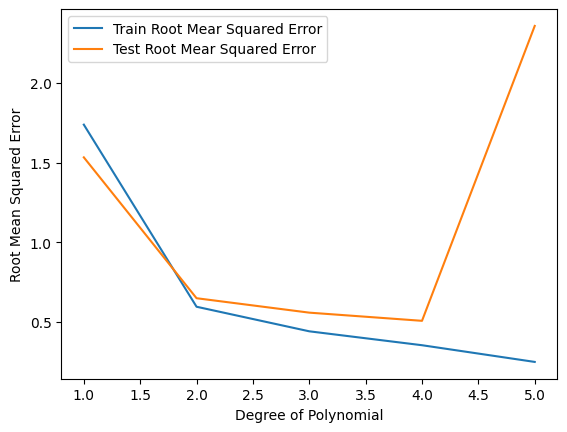

In [30]:
plt.plot(range(1, 6), train_rmse_errors[:5], label='Train Root Mear Squared Error')
plt.plot(range(1, 6), test_rmse_errors[:5], label='Test Root Mear Squared Error')
plt.xlabel("Degree of Polynomial")
plt.ylabel("Root Mean Squared Error")
plt.legend()

In [31]:
final_poly_converter = PolynomialFeatures(degree=2, include_bias=False)

In [32]:
final_model = LinearRegression()

In [33]:
full_converter_X = final_poly_converter.fit_transform(X)

In [34]:
final_model.fit(full_converter_X, y)

LinearRegression()

In [35]:
from joblib import dump, load

In [36]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [37]:
dump(final_poly_converter, 'final_poly_converter.joblib')

['final_poly_converter.joblib']

In [38]:
load_converter = load('final_poly_converter.joblib')
load_model = load('final_poly_model.joblib')

In [39]:
campaign = [[149, 22, 12]]

In [40]:
transformed_data = load_converter.fit_transform(campaign)

In [41]:
load_model.predict(transformed_data)

array([14.51114516])